# Web traffic

> ### $\hat y = a + b*X$
    b = coefficient
    a = intercept

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# working on a car dataset which contains
- speed(mph)
- stopping distance (ft)

In [2]:
sns.set(color_codes=True)

In [3]:
web = pd.read_csv('./dataset/web_traffic.tsv',sep='\t',header=None,
                   names=['Hours','Hits'])
web.head()

,Hours,Hits
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [4]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
Hours    743 non-null int64
Hits     735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB


In [5]:
web.dropna(axis=0,inplace=True)

### Discriptive Stats

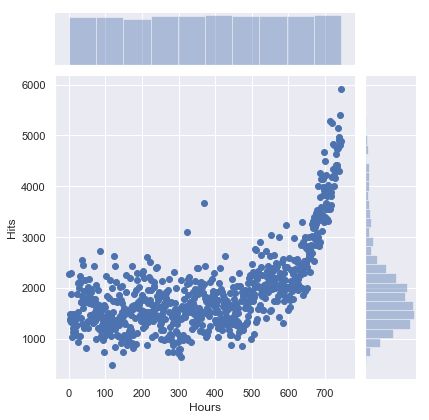

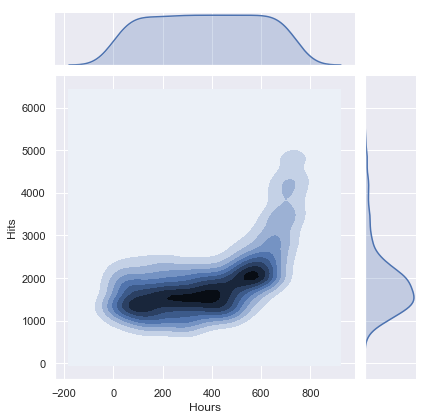

In [6]:
#join plot
#sns.relplot('speed','dist',data=cars,kind='scatter')

sns.jointplot('Hours','Hits',data=web,kind='scatter')
plt.show()
sns.jointplot('Hours','Hits',data=web,kind='kde')
plt.show()

In [7]:
import statsmodels.formula.api as smf

In [8]:
web.keys()

Index(['Hours', 'Hits'], dtype='object')

In [9]:
model = smf.ols(formula="Hits~Hours",data=web)
results = model.fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     522.8
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           9.14e-88
Time:                        11:34:27   Log-Likelihood:                -5811.5
No. Observations:                 735   AIC:                         1.163e+04
Df Residuals:                     733   BIC:                         1.164e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    989.0249     48.994     20.187      0.0

# Covariance

In [11]:
web.cov()

,Hours,Hits
Hours,45759.604564,118800.725137
Hits,118800.725137,740840.634536


>### Correlation coefficient (*r* )

In [12]:
web.corr()

,Hours,Hits
Hours,1.000000,0.645232
Hits,0.645232,1.000000


In [13]:
results.params

Intercept    989.024871
Hours          2.596192
dtype: float64

In [14]:
results.rsquared

0.41632369094258914

In [15]:
import statsmodels.api as sm

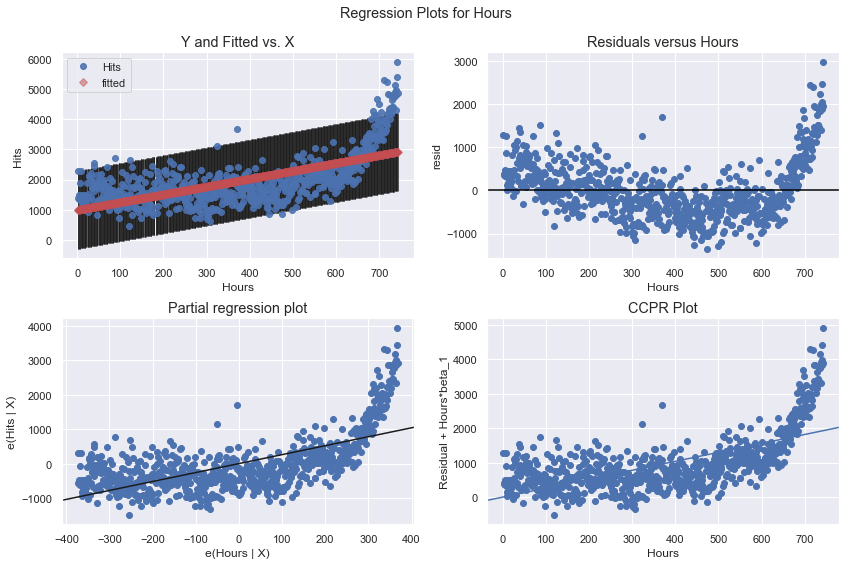

In [16]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results,'Hours',fig=fig)

In [17]:
res = results.resid

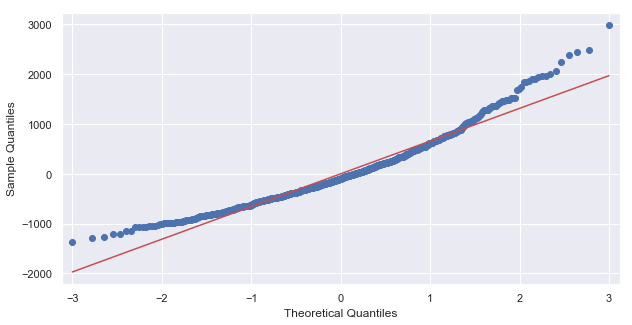

In [18]:
fig,ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.qqplot(res,line='s',ax = ax )

In [19]:
from scipy import stats
stats.shapiro(res)

(0.9517814517021179, 9.018156501509195e-15)

In [20]:
sm.stats.diagnostic.kstest_normal(res)

(0.07286337572076229, 6.51551684470257e-10)

**From above *p*-Value = `6.515e-10`**
- reject the null-hypothesis -> it is not normal distribution

# Leverage

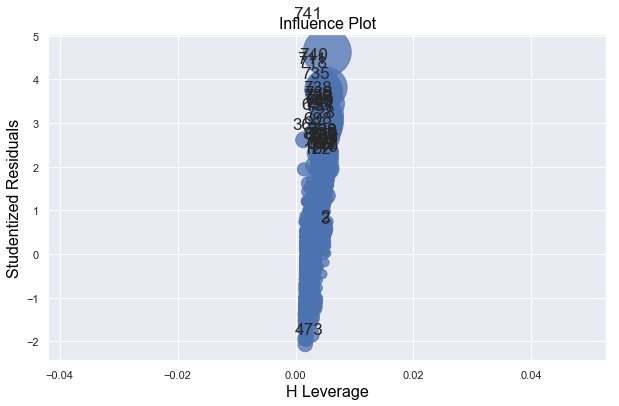

In [21]:
fig,ax = plt.subplots(figsize=(10,6))
fig =sm.graphics.influence_plot(results,ax=ax)

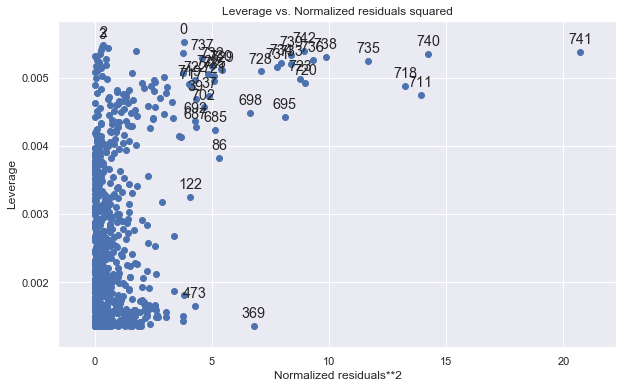

In [22]:
fig,ax = plt.subplots(figsize=(10,6))
fig =sm.graphics.plot_leverage_resid2(results,ax=ax)

In [23]:
# 3 USD
# hits = 989+2.59*Hours
hits = 100000
hours = (hits - 989) / 2.59
print('It will take around = {} hr'.format(hours))

It will take around = 38228.18532818533 hr


In [24]:
38228.18/(24*7*52)

4.375936355311356

(Text(0.5,0,'x'), Text(0,0.5,'x^3'))

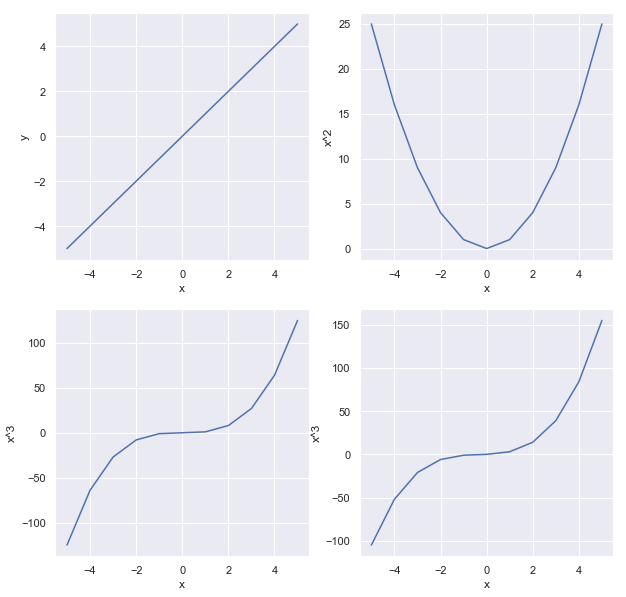

In [25]:
# 
x = np.arange(-5,6)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(x,x)
plt.xlabel('x'),plt.ylabel('y')

plt.subplot(2,2,2)
plt.plot(x,x**2)
plt.xlabel('x'),plt.ylabel('x^2')

plt.subplot(2,2,3)
plt.plot(x,x**3)
plt.xlabel('x'),plt.ylabel('x^3')


plt.subplot(2,2,4)
plt.plot(x,x+x**2+x**3)
plt.xlabel('x'),plt.ylabel('x^3')

# Polynomial Linear Regression

### $y = a + b_1 * X + b_2 *X ^2 + b_3 * X ^3 + ... + b_n * X^n$

> ### Polynomial degree 2

### $y = a + b_1 * X + b_2 *X ^2$

In [27]:
web.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


In [28]:
web2 = web.copy()
web2 = web2[['Hits','Hours']]
web2.head()

,Hits,Hours
0,2272.0,1
2,1386.0,3
3,1365.0,4
4,1488.0,5
5,1337.0,6


In [29]:
web2['Hours_sqr'] = web2['Hours'] **2
web2.head()

,Hits,Hours,Hours_sqr
0,2272.0,1,1
2,1386.0,3,9
3,1365.0,4,16
4,1488.0,5,25
5,1337.0,6,36


In [30]:
model2 = smf.ols('Hits~Hours+Hours_sqr',data=web2)

In [31]:
results = model2.fit()

In [32]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     739.8
Date:                Wed, 26 Dec 2018   Prob (F-statistic):          1.78e-176
Time:                        11:37:39   Log-Likelihood:                -5603.0
No. Observations:                 735   AIC:                         1.121e+04
Df Residuals:                     732   BIC:                         1.123e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1974.7608     55.694     35.457      0.0

In [33]:
results.params

Intercept    1974.760817
Hours          -5.265457
Hours_sqr       0.010532
dtype: float64

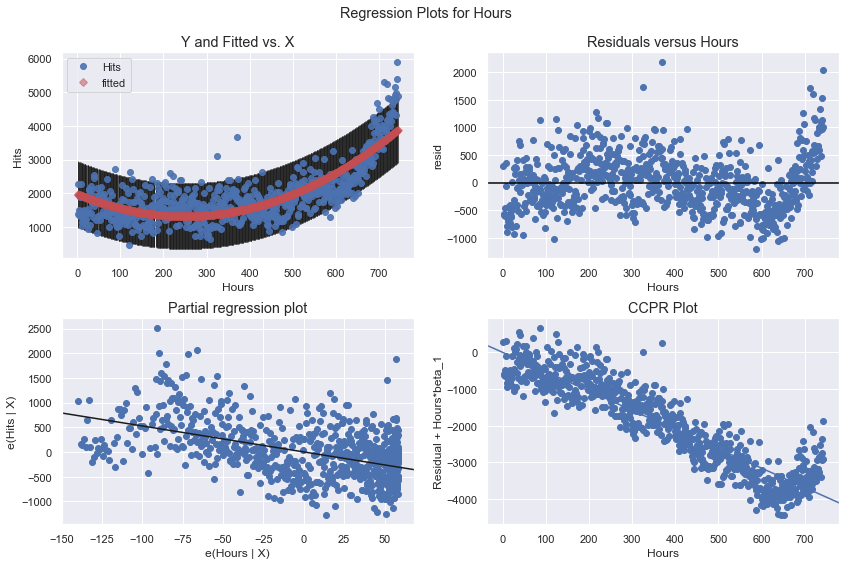

In [34]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results,'Hours',fig=fig)

(0.03941586712847511, 0.008784225864692756)

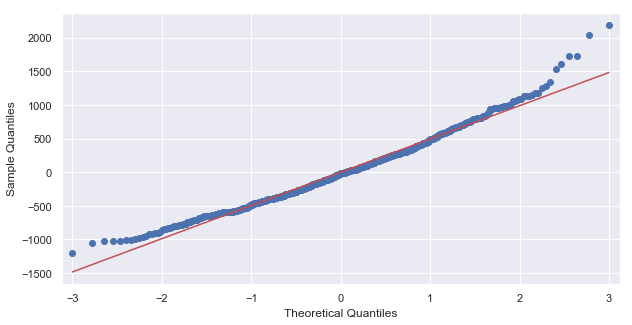

In [35]:
res = results.resid

fig,ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.qqplot(res,line='s',ax = ax )
stats.shapiro(res)

sm.stats.diagnostic.kstest_normal(res)

In [36]:
web2['Hours_cube'] = web2['Hours']**3

In [37]:
web2.head()

,Hits,Hours,Hours_sqr,Hours_cube
0,2272.0,1,1,1
2,1386.0,3,9,27
3,1365.0,4,16,64
4,1488.0,5,25,125
5,1337.0,6,36,216


In [38]:
model3 = smf.ols('Hits~Hours+Hours_sqr+Hours_cube',data=web2)
result3 =model3.fit()

In [39]:
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     707.2
Date:                Wed, 26 Dec 2018   Prob (F-statistic):          1.40e-215
Time:                        11:45:06   Log-Likelihood:                -5509.0
No. Observations:                 735   AIC:                         1.103e+04
Df Residuals:                     731   BIC:                         1.104e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1333.2880     65.843     20.249      0.0

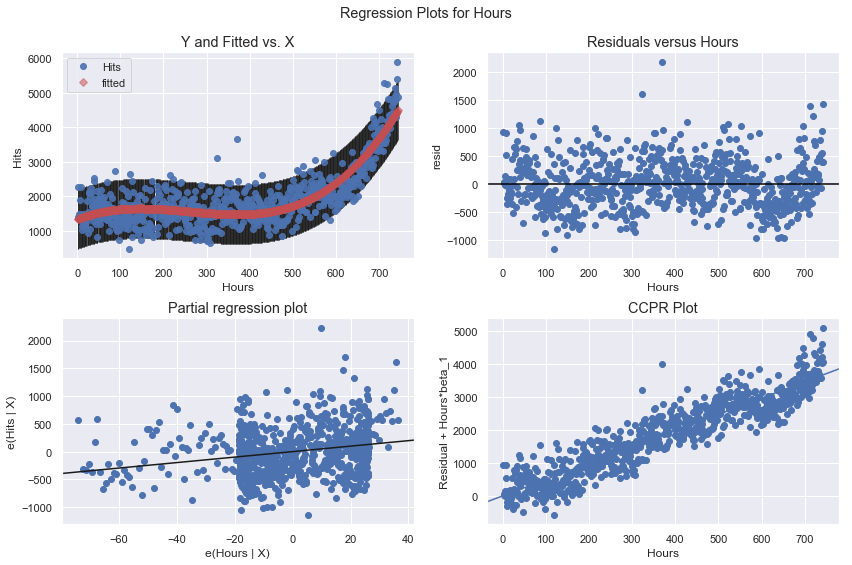

In [40]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(result3,'Hours',fig=fig)

(0.03669803422701401, 0.020218540727637718)

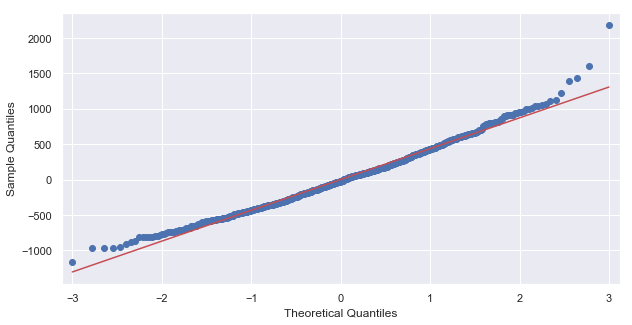

In [42]:
res = result3.resid

fig,ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.qqplot(res,line='s',ax = ax )
stats.shapiro(res)

sm.stats.diagnostic.kstest_normal(res)

In [43]:
result3.params

Intercept     1333.287965
Hours            4.942260
Hours_sqr       -0.023589
Hours_cube       0.000030
dtype: float64

In [44]:
v = [0.000030,-0.023589,4.942260,1333.28796]
np.roots(v)

array([ 466.71311433+290.26255298j,  466.71311433-290.26255298j,
       -147.12622866  +0.j        ])

In [45]:
np.sqrt(466**2+290**2)

548.8679258255122

In [46]:
548/(24*7)

3.261904761904762

In [47]:
res3 = result3.resid

In [48]:
sm.stats.diagnostic.kstest_normal(res3)

(0.03669803422701401, 0.020218540727637718)

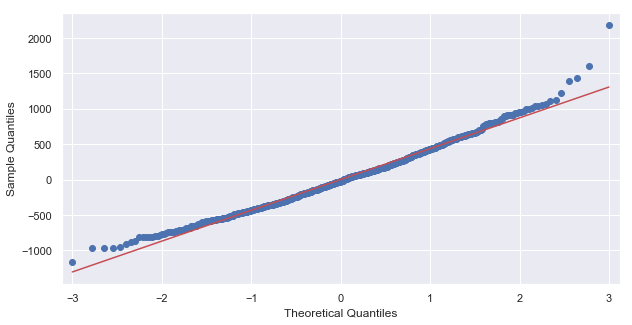

In [49]:
fig,ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.qqplot(res3,line='s',ax = ax )

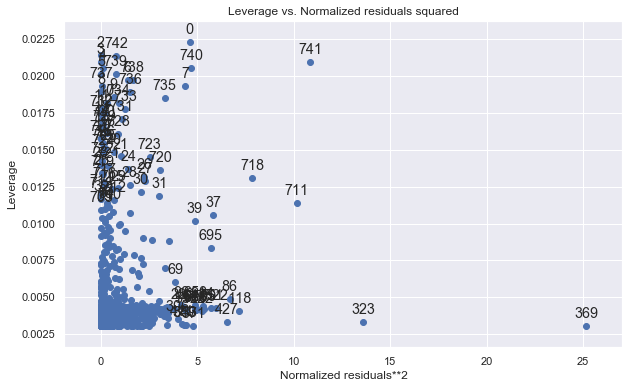

In [50]:
fig,ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.plot_leverage_resid2(result3,ax=ax)

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(result3,ax=ax)